<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(2_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,96.905893,27.272518,30.199591,-1.594208,162.783795,174.841012,-12.057218
1,0.0,1.0,22.377492,32.709164,26.616664,69.949865,161.653186,93.932285,67.720901
2,0.0,2.0,98.112411,37.436148,48.297779,16.779646,210.625982,205.094216,5.531767
3,0.0,3.0,39.638542,63.825785,48.703073,-414.256412,-252.089011,161.984697,-414.073708
4,0.0,4.0,99.295139,72.720767,73.747996,260.511257,516.275160,262.811683,253.463477
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.260831,87.859009,88.477557,-289.853867,-68.256470,192.347426,-260.603896
249996,999.0,246.0,96.974379,58.978352,56.117251,-129.849152,92.220830,246.769948,-154.549119
249997,999.0,247.0,35.934614,28.950670,67.742051,58.872679,201.500013,132.323050,69.176964
249998,999.0,248.0,78.990911,62.893437,91.266796,-113.644380,129.506764,261.353971,-131.847207


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,96.905893,27.272518,30.199591,-1.594208,162.783795,174.841012,-12.057218
1,0.0,1.0,22.377492,32.709164,26.616664,69.949865,161.653186,93.932285,67.720901
2,0.0,2.0,98.112411,37.436148,48.297779,16.779646,210.625982,205.094216,5.531767
3,0.0,3.0,39.638542,63.825785,48.703073,-414.256412,-252.089011,161.984697,-414.073708
4,0.0,4.0,99.295139,72.720767,73.747996,260.511257,516.275160,262.811683,253.463477
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.260831,87.859009,88.477557,-289.853867,-68.256470,192.347426,-260.603896
249996,999.0,246.0,96.974379,58.978352,56.117251,-129.849152,92.220830,246.769948,-154.549119
249997,999.0,247.0,35.934614,28.950670,67.742051,58.872679,201.500013,132.323050,69.176964
249998,999.0,248.0,78.990911,62.893437,91.266796,-113.644380,129.506764,261.353971,-131.847207


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    96.905893  27.272518  ...  174.841012  -12.057218
      1.0    22.377492  32.709164  ...   93.932285   67.720901
      2.0    98.112411  37.436148  ...  205.094216    5.531767
      3.0    39.638542  63.825785  ...  161.984697 -414.073708
      4.0    99.295139  72.720767  ...  262.811683  253.463477
...                ...        ...  ...         ...         ...
999.0 245.0  35.260831  87.859009  ...  192.347426 -260.603896
      246.0  96.974379  58.978352  ...  246.769948 -154.549119
      247.0  35.934614  28.950670  ...  132.323050   69.176964
      248.0  78.990911  62.893437  ...  261.353971 -131.847207
      249.0  28.763024  39.509997  ...  141.676168  171.432058

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    96.905893  27.272518  ...  174.841012  -12.057218
      1.0    22.377492  32.709164  ...   93.932285   67.720901
      2.0    98.112411  37.436148  ...  205.094216    5.531767
      3.0    39.638542  63.825785  ...  161.984697 -414.073708
      4.0    99.295139  72.720767  ...  262.811683  253.463477
...                ...        ...  ...         ...         ...
999.0 245.0  35.260831  87.859009  ...  192.347426 -260.603896
      246.0  96.974379  58.978352  ...  246.769948 -154.549119
      247.0  35.934614  28.950670  ...  132.323050   69.176964
      248.0  78.990911  62.893437  ...  261.353971 -131.847207
      249.0  28.763024  39.509997  ...  141.676168  171.432058

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,96.905893,27.272518,30.199591,-1.594208,162.783795,174.841012,-12.057218
1,0.0,1.0,22.377492,32.709164,26.616664,69.949865,161.653186,93.932285,67.720901
2,0.0,2.0,98.112411,37.436148,48.297779,16.779646,210.625982,205.094216,5.531767
3,0.0,3.0,39.638542,63.825785,48.703073,-414.256412,-252.089011,161.984697,-414.073708
4,0.0,4.0,99.295139,72.720767,73.747996,260.511257,516.275160,262.811683,253.463477
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.260831,87.859009,88.477557,-289.853867,-68.256470,192.347426,-260.603896
249996,999.0,246.0,96.974379,58.978352,56.117251,-129.849152,92.220830,246.769948,-154.549119
249997,999.0,247.0,35.934614,28.950670,67.742051,58.872679,201.500013,132.323050,69.176964
249998,999.0,248.0,78.990911,62.893437,91.266796,-113.644380,129.506764,261.353971,-131.847207


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    96.905893  27.272518  ...  174.841012  -12.057218
      1.0    22.377492  32.709164  ...   93.932285   67.720901
      2.0    98.112411  37.436148  ...  205.094216    5.531767
      3.0    39.638542  63.825785  ...  161.984697 -414.073708
      4.0    99.295139  72.720767  ...  262.811683  253.463477
...                ...        ...  ...         ...         ...
999.0 245.0  35.260831  87.859009  ...  192.347426 -260.603896
      246.0  96.974379  58.978352  ...  246.769948 -154.549119
      247.0  35.934614  28.950670  ...  132.323050   69.176964
      248.0  78.990911  62.893437  ...  261.353971 -131.847207
      249.0  28.763024  39.509997  ...  141.676168  171.432058

[250000 rows x 7 columns]

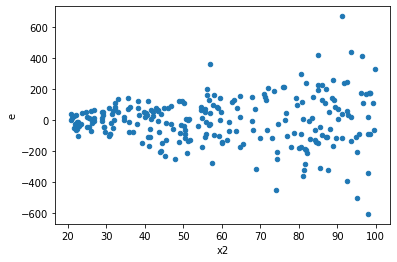

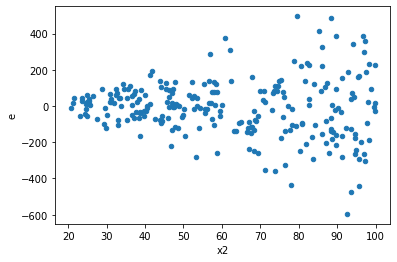

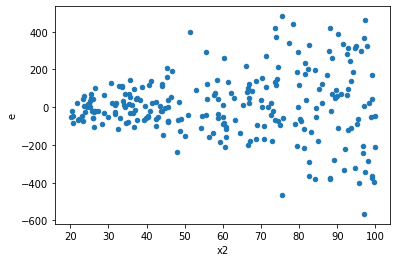

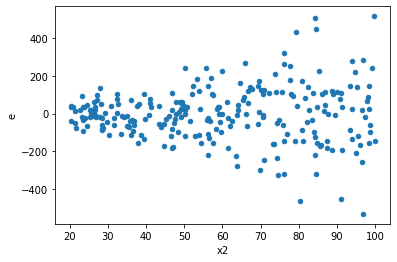

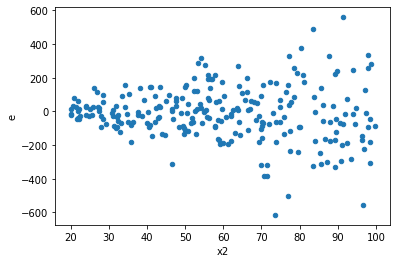

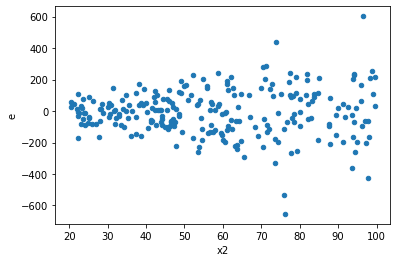

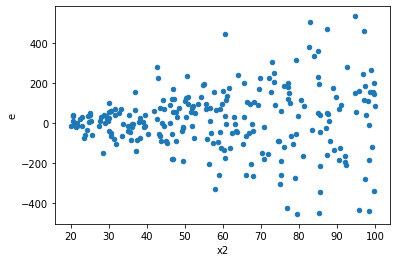

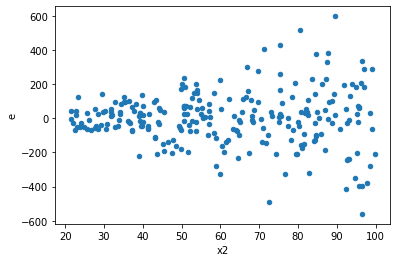

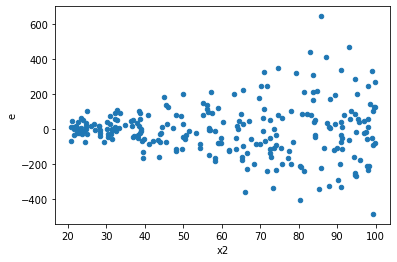

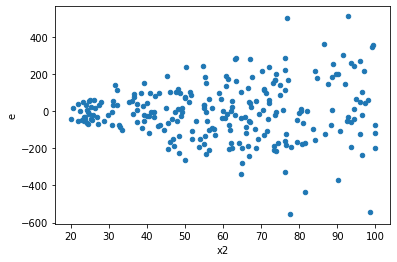

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,798454.4043824151,4217221.4783381345,8231.488704973352,43476.51008596015,5.281731123519886,8.215650382226158e-15,0.9999999999999959,4.107825191113079e-15,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,508045.59032712446,3447361.5540614547,5237.583405434273,35539.8098356851,6.7855358253217775,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,631660.1254214984,4143300.7855428224,6511.960055891736,42714.441088070336,6.559383153682612,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,587685.2050721367,3997859.0314442813,6058.61036156842,41215.04156128125,6.802721928236317,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,549804.9620339253,5166297.150728916,5668.092392102323,53260.795368339335,9.396599717137752,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,517015.5643342711,4017318.786691959,5330.057364270836,41415.657594762466,7.770208604580041,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,615193.4121902547,4352450.2129142005,6342.200125672728,44870.62075169279,7.074929813403402,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,680841.8302789377,4204737.020672469,7018.9879410199765,43347.804336829584,6.175791253821476,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,692483.5452431611,4825762.791376476,7139.005621063517,49750.131869860576,6.968776116812913,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,798454.4043824151,4217221.4783381345,8231.488704973352,43476.51008596015,5.281731123519886,8.215650382226158e-15,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,508045.59032712446,3447361.5540614547,5237.583405434273,35539.8098356851,6.7855358253217775,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,631660.1254214984,4143300.7855428224,6511.960055891736,42714.441088070336,6.559383153682612,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,587685.2050721367,3997859.0314442813,6058.61036156842,41215.04156128125,6.802721928236317,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,549804.9620339253,5166297.150728916,5668.092392102323,53260.795368339335,9.396599717137752,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,517015.5643342711,4017318.786691959,5330.057364270836,41415.657594762466,7.770208604580041,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,615193.4121902547,4352450.2129142005,6342.200125672728,44870.62075169279,7.074929813403402,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,680841.8302789377,4204737.020672469,7018.9879410199765,43347.804336829584,6.175791253821476,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,692483.5452431611,4825762.791376476,7139.005621063517,49750.131869860576,6.968776116812913,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64